In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('/kaggle/input/titanic/train.csv')

In [4]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [8]:
df['Age']=df['Age'].fillna(df.groupby('Pclass')['Age'].transform('mean'))

In [9]:
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [10]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889,889.000000,889.000000,889.000000,889.000000,889
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644
mean,0.382452,2.311586,NaN,29.246290,0.524184,0.382452,32.096681,NaN
std,0.486260,0.834700,NaN,13.176451,1.103705,0.806761,49.697504,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,2.000000,NaN,22.000000,0.000000,0.000000,7.895800,NaN
50%,0.000000,3.000000,NaN,26.000000,0.000000,0.000000,14.454200,NaN
75%,1.000000,3.000000,NaN,36.500000,1.000000,0.000000,31.000000,NaN


In [13]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df[['Sex','Embarked']]=oe.fit_transform(df[['Sex','Embarked']])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1.0,22.0,1,0,7.2500,2.0
1,1,1,0.0,38.0,1,0,71.2833,0.0
2,1,3,0.0,26.0,0,0,7.9250,2.0
3,1,1,0.0,35.0,1,0,53.1000,2.0
4,0,3,1.0,35.0,0,0,8.0500,2.0


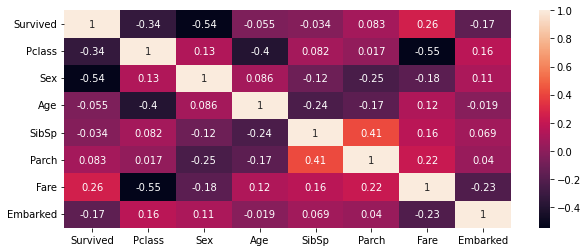

In [14]:
plt.figure(figsize=(10,4))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [15]:
df['Family']=df['SibSp']+df['Parch']
df.drop(['SibSp','Parch'],axis=1,inplace=True)

In [16]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [17]:
y.value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=1,test_size=0.2,stratify=y)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

knn=KNeighborsClassifier()
lr=LogisticRegression()
gnb=GaussianNB()
svc=SVC()

knn.fit(xtrain,ytrain)
lr.fit(xtrain,ytrain)
gnb.fit(xtrain,ytrain)
svc.fit(xtrain,ytrain)

knnpred=knn.predict(xtest)
lrpred=lr.predict(xtest)
gnbpred=gnb.predict(xtest)
svcpred=svc.predict(xtest)

In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('KNN Score')
acc=accuracy_score(ytest,knnpred)
cm=confusion_matrix(ytest,knnpred)
cr=classification_report(ytest,knnpred)
tr=knn.score(xtrain,ytrain)
te=knn.score(xtest,ytest)
print(f'Accuracy: {acc}\n{cm}\n{cr}\nTraining Accuracy: {tr}\nTesting Accuracy: {te}')
print()
print('LogisticRegression Score')
acc=accuracy_score(ytest,lrpred)
cm=confusion_matrix(ytest,lrpred)
cr=classification_report(ytest,lrpred)
tr=lr.score(xtrain,ytrain)
te=lr.score(xtest,ytest)
print(f'Accuracy: {acc}\n{cm}\n{cr}\nTraining Accuracy: {tr}\nTesting Accuracy: {te}')
print()
print('GaussianNB Score')
acc=accuracy_score(ytest,gnbpred)
cm=confusion_matrix(ytest,gnbpred)
cr=classification_report(ytest,gnbpred)
tr=gnb.score(xtrain,ytrain)
te=gnb.score(xtest,ytest)
print(f'Accuracy: {acc}\n{cm}\n{cr}\nTraining Accuracy: {tr}\nTesting Accuracy: {te}')
print()
print('SVC Score')
acc=accuracy_score(ytest,svcpred)
cm=confusion_matrix(ytest,svcpred)
cr=classification_report(ytest,svcpred)
tr=svc.score(xtrain,ytrain)
te=svc.score(xtest,ytest)
print(f'Accuracy: {acc}\n{cm}\n{cr}\nTraining Accuracy: {tr}\nTesting Accuracy: {te}')


KNN Score
Accuracy: 0.7415730337078652
[[87 23]
 [23 45]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       110
           1       0.66      0.66      0.66        68

    accuracy                           0.74       178
   macro avg       0.73      0.73      0.73       178
weighted avg       0.74      0.74      0.74       178

Training Accuracy: 0.7819971870604782
Testing Accuracy: 0.7415730337078652

LogisticRegression Score
Accuracy: 0.8089887640449438
[[94 16]
 [18 50]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       110
           1       0.76      0.74      0.75        68

    accuracy                           0.81       178
   macro avg       0.80      0.79      0.80       178
weighted avg       0.81      0.81      0.81       178

Training Accuracy: 0.8045007032348804
Testing Accuracy: 0.8089887640449438

GaussianNB Score
Accuracy: 0.8089887640449438
[[93 17]
 [17 51]

In [21]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [22]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x.iloc[:,:]=ss.fit_transform(x.iloc[:,:])

In [23]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=1,test_size=0.2,stratify=y)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

knn=KNeighborsClassifier()
lr=LogisticRegression()
gnb=GaussianNB()
svc=SVC()

knn.fit(xtrain,ytrain)
lr.fit(xtrain,ytrain)
gnb.fit(xtrain,ytrain)
svc.fit(xtrain,ytrain)

knnpred=knn.predict(xtest)
lrpred=lr.predict(xtest)
gnbpred=gnb.predict(xtest)
svcpred=svc.predict(xtest)

In [25]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('KNN Score')
acc=accuracy_score(ytest,knnpred)
cm=confusion_matrix(ytest,knnpred)
cr=classification_report(ytest,knnpred)
tr=knn.score(xtrain,ytrain)
te=knn.score(xtest,ytest)
print(f'Accuracy: {acc}\n{cm}\n{cr}\nTraining Accuracy: {tr}\nTesting Accuracy: {te}')
print()
print('LogisticRegression Score')
acc=accuracy_score(ytest,lrpred)
cm=confusion_matrix(ytest,lrpred)
cr=classification_report(ytest,lrpred)
tr=lr.score(xtrain,ytrain)
te=lr.score(xtest,ytest)
print(f'Accuracy: {acc}\n{cm}\n{cr}\nTraining Accuracy: {tr}\nTesting Accuracy: {te}')
print()
print('GaussianNB Score')
acc=accuracy_score(ytest,gnbpred)
cm=confusion_matrix(ytest,gnbpred)
cr=classification_report(ytest,gnbpred)
tr=gnb.score(xtrain,ytrain)
te=gnb.score(xtest,ytest)
print(f'Accuracy: {acc}\n{cm}\n{cr}\nTraining Accuracy: {tr}\nTesting Accuracy: {te}')
print()
print('SVC Score')
acc=accuracy_score(ytest,svcpred)
cm=confusion_matrix(ytest,svcpred)
cr=classification_report(ytest,svcpred)
tr=svc.score(xtrain,ytrain)
te=svc.score(xtest,ytest)
print(f'Accuracy: {acc}\n{cm}\n{cr}\nTraining Accuracy: {tr}\nTesting Accuracy: {te}')

KNN Score
Accuracy: 0.8370786516853933
[[98 12]
 [17 51]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       110
           1       0.81      0.75      0.78        68

    accuracy                           0.84       178
   macro avg       0.83      0.82      0.82       178
weighted avg       0.84      0.84      0.84       178

Training Accuracy: 0.8509142053445851
Testing Accuracy: 0.8370786516853933

LogisticRegression Score
Accuracy: 0.8089887640449438
[[94 16]
 [18 50]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       110
           1       0.76      0.74      0.75        68

    accuracy                           0.81       178
   macro avg       0.80      0.79      0.80       178
weighted avg       0.81      0.81      0.81       178

Training Accuracy: 0.8016877637130801
Testing Accuracy: 0.8089887640449438

GaussianNB Score
Accuracy: 0.8089887640449438
[[93 17]
 [17 51]

# KNN and SVC is giving the best accuracy with least False Negative errors

In [26]:
df=pd.read_csv('/kaggle/input/titanic/test.csv')

In [27]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [28]:
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [29]:
df.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [30]:
df['Age']=df['Age'].fillna(df.groupby('Pclass')['Age'].transform('mean'))

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [32]:
df['Fare'].fillna(df['Fare'].mean(),inplace=True)

In [33]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df[['Sex','Embarked']]=oe.fit_transform(df[['Sex','Embarked']])
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1.0,34.5,0,0,7.8292,1.0
1,3,0.0,47.0,1,0,7.0000,2.0
2,2,1.0,62.0,0,0,9.6875,1.0
3,3,1.0,27.0,0,0,8.6625,2.0
4,3,0.0,22.0,1,1,12.2875,2.0


In [34]:
df['Family']=df['SibSp']+df['Parch']
df.drop(['SibSp','Parch'],axis=1,inplace=True)

In [35]:
knnpred=knn.predict(df)

In [36]:
knnpred

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,

In [37]:
test=pd.read_csv('/kaggle/input/titanic/test.csv')

In [38]:
PassengerId=test.iloc[:,0]

In [39]:
submission=pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':knnpred})

In [40]:
filename='Titanic Prediction-KNN Model'
submission.to_csv(filename,index=False)

print('Saved File: '+filename)

Saved File: Titanic Prediction-KNN Model
